In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cbuckle = pd.read_csv("data/cbuckle_100.csv")
cbuckle.head()

,matrix_name,error_perc,error_pos,pos_2norm,errorfree_iterations,iterations,final_relres,converged,time_s
0,cbuckle.mat,0.0,8474,76.930715,341,466,9.940043e-07,True,0.535802
1,cbuckle.mat,0.0,2152,24333.448283,341,342,9.947012e-07,True,0.385707
2,cbuckle.mat,0.0,9703,99.923192,341,342,9.858204e-07,True,0.373365
3,cbuckle.mat,0.0,3964,8623.461981,341,340,9.655325e-07,True,0.366760
4,cbuckle.mat,0.0,2726,37.307549,341,378,9.606054e-07,True,0.404746


In [3]:
bcsstk18 = pd.read_csv("data/bcsstk18_100.csv")
bcsstk18.head()

,matrix_name,error_perc,error_pos,pos_2norm,errorfree_iterations,iterations,final_relres,converged,time_s
0,bcsstk18.mat,0.0,9131,9.309282e+08,431,451,9.980190e-07,True,0.250409
1,bcsstk18.mat,0.0,11757,1.000000e+00,431,1639,9.756767e-07,True,0.910582
2,bcsstk18.mat,0.0,7475,4.781892e+01,431,473,9.823096e-07,True,0.261434
3,bcsstk18.mat,0.0,10706,1.000000e+00,431,2670,9.725280e-07,True,1.471159
4,bcsstk18.mat,0.0,2253,2.321814e+09,431,1185,9.979383e-07,True,0.650042


In [4]:
g_cbuckle = cbuckle.groupby("error_perc")
g_bcsstk18 = bcsstk18.groupby("error_perc")
cs = ["red", "green", "blue", "orange", "magenta"]
ms = ["o", "v", "^", "<", ">"]

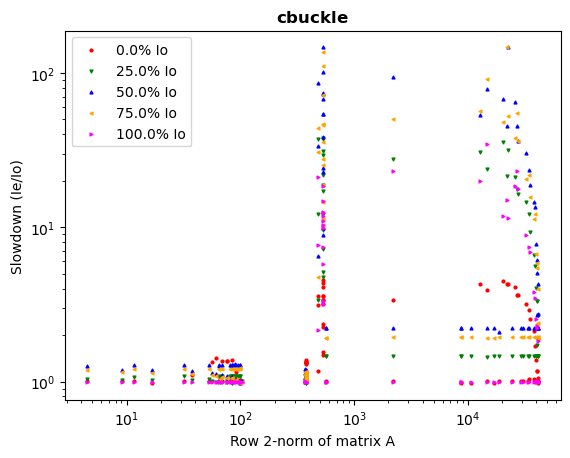

In [5]:
plt.title(r"$\bf cbuckle$")
plt.xlabel("Row 2-norm of matrix A")
plt.xscale("log")
plt.ylabel("Slowdown (Ie/Io)")
plt.yscale("log")

for i, (gname, data) in enumerate(g_cbuckle):
    plt.scatter(data["pos_2norm"], data["iterations"] / data["errorfree_iterations"],
                c=cs[i], marker=ms[i], s=4, label=f"{gname}% Io")

plt.legend()
plt.show()

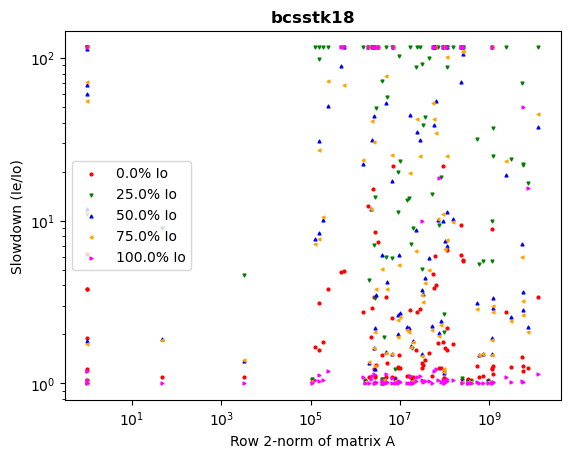

In [6]:
plt.title(r"$\bf bcsstk18$")
plt.xlabel("Row 2-norm of matrix A")
plt.xscale("log")
plt.ylabel("Slowdown (Ie/Io)")
plt.yscale("log")

for i, (gname, data) in enumerate(g_bcsstk18):
    plt.scatter(data["pos_2norm"], data["iterations"] / data["errorfree_iterations"],
                c=cs[i], marker=ms[i], s=4, label=f"{gname}% Io")

plt.legend()
plt.show()

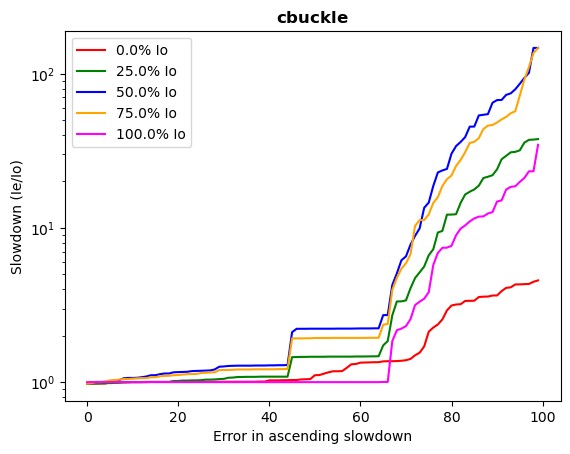

In [7]:
plt.title(r"$\bf cbuckle$")
plt.xlabel("Error in ascending slowdown")
plt.ylabel("Slowdown (Ie/Io)")
plt.yscale("log")

for i, (gname, data) in enumerate(g_cbuckle):
    s = data[["iterations", "errorfree_iterations"]].sort_values("iterations")
    plt.plot(range(len(data)), s["iterations"] / s["errorfree_iterations"],
                c=cs[i], label=f"{gname}% Io")

plt.legend()
plt.show()

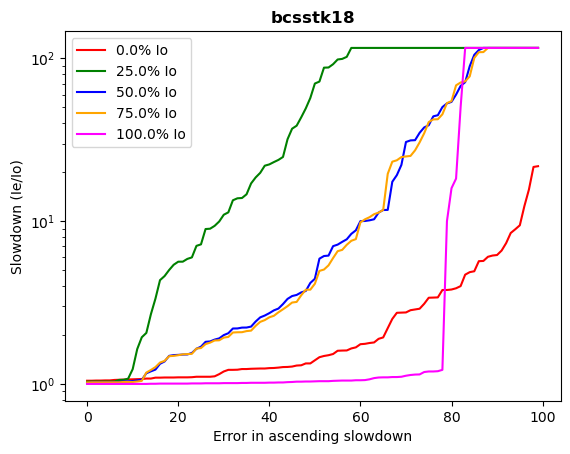

In [8]:
plt.title(r"$\bf bcsstk18$")
plt.xlabel("Error in ascending slowdown")
plt.ylabel("Slowdown (Ie/Io)")
plt.yscale("log")

for i, (gname, data) in enumerate(g_bcsstk18):
    s = data[["iterations", "errorfree_iterations"]].sort_values("iterations")
    plt.plot(range(len(data)), s["iterations"] / s["errorfree_iterations"],
                c=cs[i], label=f"{gname}% Io")

plt.legend()
plt.show()